In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Set the correct dataset path
dataset_path = "/Users/nyssaaftab/Downloads/cvs"

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create the training data generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Print the class indices
#print(train_generator.class_indices)

# Rest of your code, including model training, evaluation, and predictions

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(200, 200),  # Adjust target_size to match your image size
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build a simple convolutional neural network (CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(51, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)
model.save('handwritten1.model')


Found 609 images belonging to 51 classes.
Found 149 images belonging to 51 classes.
Epoch 1/10
20/20 [==============================] - 4s 177ms/step - loss: 39.7062 - accuracy: 0.0115 - val_loss: 5.9522 - val_accuracy: 0.0201
Epoch 2/10
20/20 [==============================] - 3s 158ms/step - loss: 4.1442 - accuracy: 0.0821 - val_loss: 3.9266 - val_accuracy: 0.0470
Epoch 3/10
20/20 [==============================] - 3s 153ms/step - loss: 2.6553 - accuracy: 0.5961 - val_loss: 3.7301 - val_accuracy: 0.1745
Epoch 4/10
20/20 [==============================] - 3s 155ms/step - loss: 0.8446 - accuracy: 0.8506 - val_loss: 3.3898 - val_accuracy: 0.2081
Epoch 5/10
20/20 [==============================] - 3s 153ms/step - loss: 0.0614 - accuracy: 0.9951 - val_loss: 3.2279 - val_accuracy: 0.2483
Epoch 6/10
20/20 [==============================] - 3s 150ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.2469 - val_accuracy: 0.2819
Epoch 7/10
20/20 [==============================] - 3s 155ms/st

INFO:tensorflow:Assets written to: handwritten1.model/assets


In [3]:
print(train_generator.class_indices)



{'a': 0, 'ba': 1, 'be': 2, 'bu': 3, 'da': 4, 'de': 5, 'du': 6, 'e': 7, 'ga': 8, 'ge': 9, 'gu': 10, 'ha': 11, 'he': 12, 'hi': 13, 'hu': 14, 'i': 15, 'ka': 16, 'ke': 17, 'ku': 18, 'la': 19, 'le': 20, 'lu': 21, 'ma': 22, 'me': 23, 'mu': 24, 'na': 25, 'ne': 26, 'ni': 27, 'nu': 28, 'pa': 29, 'pe': 30, 'qa': 31, 'ra': 32, 're': 33, 'ru': 34, 'sa': 35, 'se': 36, 'si': 37, 'su': 38, 'ta': 39, 'te': 40, 'ti': 41, 'tu': 42, 'u': 43, 'wa': 44, 'wi': 45, 'ya': 46, 'za': 47, 'ze': 48, 'zi': 49, 'zu': 50}


In [4]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)

# Print the evaluation results
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

5/5 [==============================] - 0s 40ms/step - loss: 3.1541 - accuracy: 0.3087
Validation Loss: 3.154102325439453
Validation Accuracy: 0.3087248206138611


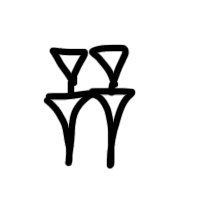

1/1 [==============================] - 0s 19ms/step
This character is probably a za


In [8]:
img = cv2.imread("zatest.png")

img = cv2.imread("zatest.png")

display(Image(filename="zatest.png"))


#expected_shape = (28, 28)

img = np.invert(np.array([img]))
prediction = model.predict(img)
predicted_label_numeric = np.argmax(prediction)

# Map the numeric label to the corresponding character string
predicted_label_string = [key for key, value in train_generator.class_indices.items() if value == predicted_label_numeric][0]

# Print the result
print(f"This character is probably a {predicted_label_string}")
#plt.imshow(img[0], cmap=plt.cm.binary)
#plt.show()